In [1]:
import numpy as np

# Parameters
n, p = 50, 40  # Dimensions of the matrix
noise_std = 0.1  # Standard deviation of the homoscedastic noise

# Generate two random vectors
u = np.random.rand(n)  # Vector of length n
v = np.random.rand(p)  # Vector of length p

# Create a rank-1 matrix as the outer product of u and v
rank_1_matrix = np.outer(u, v)

# Add homoscedastic Gaussian noise (constant variance across the matrix)
noise = np.random.normal(0, noise_std, size=(n, p))
noisy_matrix = rank_1_matrix + noise

# Print the original and noisy matrix
print("Rank-1 Matrix (Outer Product):")
print(rank_1_matrix)
print("\nNoisy Matrix (with Homoscedastic Noise):")
print(noisy_matrix)


Rank-1 Matrix (Outer Product):
[[0.28828574 0.72968328 0.06612074 ... 0.19095324 0.09683449 0.66408981]
 [0.0366013  0.09264196 0.00839481 ... 0.02424378 0.01229429 0.08431408]
 [0.19107827 0.48364035 0.04382539 ... 0.12656545 0.06418273 0.44016443]
 ...
 [0.20885756 0.52864171 0.04790322 ... 0.138342   0.07015476 0.48112048]
 [0.09853769 0.24940984 0.02260044 ... 0.06526889 0.03309857 0.22698963]
 [0.14481473 0.36654219 0.03321446 ... 0.09592164 0.04864292 0.33359258]]

Noisy Matrix (with Homoscedastic Noise):
[[ 0.18021019  0.69159098 -0.05492718 ...  0.2140411  -0.01240883
   0.78872955]
 [ 0.05209106  0.2321973   0.06274797 ...  0.16494932  0.13997324
   0.31293376]
 [ 0.25967837  0.28532242  0.12408159 ...  0.43274165  0.10134135
   0.35178092]
 ...
 [ 0.26123585  0.53196967  0.10469753 ...  0.04284874 -0.11148429
   0.45500169]
 [ 0.05677494  0.29432665  0.14750789 ...  0.00212895  0.0767072
   0.23483831]
 [ 0.15609776  0.46532283  0.15495275 ... -0.06099432  0.25290889
   0.225

In [2]:
import sys
import os
import matplotlib.pyplot as plt

# Add the path to utils.py
sys.path.append(r"c:\Document\Serieux\Travail\python_work\cEBNM_torch\py")
from cEBMF import *

In [3]:
mycebmf= cEBMF(data= noisy_matrix)
K=5
# Perform udv_si transformation
U, s, Vt = np.linalg.svd(noisy_matrix, full_matrices=False)


In [4]:
K = np.min([K, U.shape[1]])
print(K)

5


In [5]:
mycebmf.init_LF()
print(mycebmf.L[:,1])
print(mycebmf.F[:,1])


tamere
[ 0.07425332 -0.1654227   0.05767032 -0.11547811  0.05218521 -0.20883214
 -0.17467103 -0.10539607 -0.10051081 -0.01532096 -0.07331732  0.19491996
 -0.16509681 -0.14431337 -0.16105553  0.00896792  0.0495415  -0.04009314
 -0.24984181  0.11373114  0.10449161  0.36173664 -0.38678719 -0.09752849
 -0.19396108 -0.09717038  0.07084611  0.04890412  0.16332581  0.30613141
 -0.01508876 -0.165629    0.12356962  0.10451678  0.05937162 -0.03704216
 -0.21306832 -0.4542785   0.00226074  0.07138158  0.25514017  0.16430174
 -0.21458426  0.34657544  0.14469623  0.03945254  0.05479046  0.38471429
 -0.05472715  0.03425313]
[-0.01062264 -0.14221528 -0.0499961  -0.06985379  0.13980936 -0.19060847
  0.17635983  0.16497518  0.04526262  0.0333245  -0.23243825  0.19864881
  0.16769724  0.24104448 -0.10020836  0.01723526 -0.15486891  0.19346644
  0.24587138  0.14008783  0.01942959 -0.0256582   0.01274603  0.04217771
 -0.03263732 -0.09974393 -0.175068    0.1324519  -0.15985579  0.2009146
 -0.10166667 -0.348

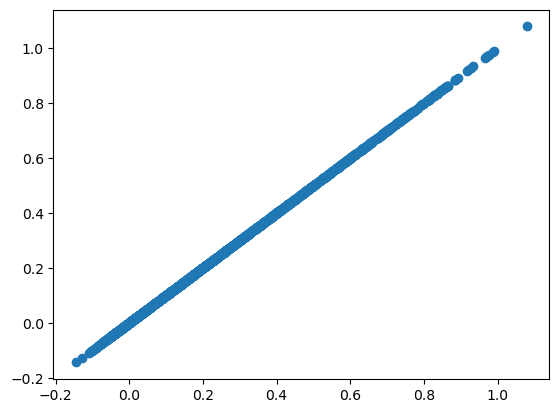

In [6]:
mycebmf.update_fitted_val()
U_k = U[:, :K]
D_k = np.diag(s[:K])
V_k = Vt[:K, :]
L = np.matmul(U_k,  D_k)
F =V_k.T
 
plt.scatter(mycebmf.Y_fit , np.sum( [np.outer(    L[:, k]  ,   F[:, k]    ) for k in range(  K)], axis=0) )

check partial residual is good, seems fine

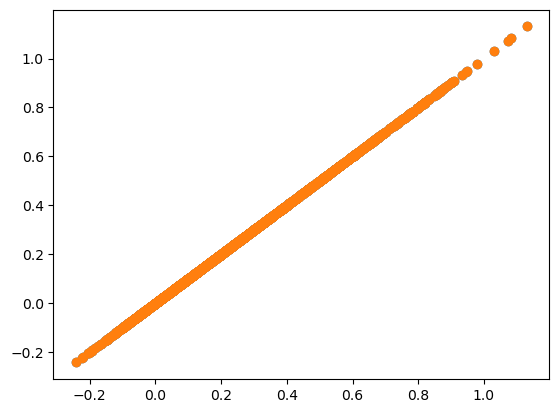

In [7]:
mycebmf.cal_partial_residuals(k=0)
mycebmf.update_fitted_val()
idx_loop = set(range(5))-{0}
Rk= noisy_matrix-np.sum( [np.outer(  mycebmf.L[:, j]  ,  mycebmf.F[:, j]    ) for j in  idx_loop], axis=0)
plt.scatter (mycebmf.Rk, Rk)
plt.scatter( mycebmf.Rk, 
            noisy_matrix- np.sum( [np.outer(    L[:, k]  ,   F[:, k]    ) for k in set(range(  K))-{0}], axis=0)
            )

check if update works

In [8]:
mycebmf.update_tau()
mycebmf.tau

tamere


array([[138.86631282, 138.86631282, 138.86631282, ..., 138.86631282,
        138.86631282, 138.86631282],
       [138.86631282, 138.86631282, 138.86631282, ..., 138.86631282,
        138.86631282, 138.86631282],
       [138.86631282, 138.86631282, 138.86631282, ..., 138.86631282,
        138.86631282, 138.86631282],
       ...,
       [138.86631282, 138.86631282, 138.86631282, ..., 138.86631282,
        138.86631282, 138.86631282],
       [138.86631282, 138.86631282, 138.86631282, ..., 138.86631282,
        138.86631282, 138.86631282],
       [138.86631282, 138.86631282, 138.86631282, ..., 138.86631282,
        138.86631282, 138.86631282]])

In [13]:
mycebmf.update_loading_factor_k(k=0)

In [10]:
k=0

mycebmf.cal_partial_residuals(k=k)
compute_hat_l_and_s_l(Z = mycebmf.Rk,
                                                            nu = mycebmf.F[:,k] ,
                                                            omega= mycebmf.F2[:,k], 
                                                            tau= mycebmf.tau  )
compute_hat_f_and_s_f(Z = mycebmf.Rk,
                                                            nu = mycebmf.L[:,k] ,
                                                            omega= mycebmf.L2[:,k], 
                                                            tau= mycebmf.tau  )
 

(array([-0.00270799, -0.00764893, -0.000356  , -0.00403938, -0.00207448,
        -0.00598099, -0.00706435, -0.00315847, -0.00740742, -0.00427979,
        -0.002279  , -0.00641483,  0.00015648, -0.00531096, -0.0034578 ,
        -0.00091009, -0.00261293, -0.00796309, -0.00041547, -0.00551112,
        -0.00708391, -0.00589078, -0.00272032,  0.00055475, -0.00027104,
        -0.00390389, -0.005103  , -0.00652643, -0.00479572, -0.0056994 ,
        -0.00515992, -0.00131156, -0.00853827, -0.00460489, -0.00280075,
        -0.00520201, -0.00354974, -0.00225082, -0.00102161, -0.00677107]),
 array([964192.641751, 964192.641751, 964192.641751, 964192.641751,
        964192.641751, 964192.641751, 964192.641751, 964192.641751,
        964192.641751, 964192.641751, 964192.641751, 964192.641751,
        964192.641751, 964192.641751, 964192.641751, 964192.641751,
        964192.641751, 964192.641751, 964192.641751, 964192.641751,
        964192.641751, 964192.641751, 964192.641751, 964192.641751,
      

In [14]:
mycebmf.L2

 

array([[5.35575508e+09, 5.51355517e-03, 2.08685863e-02, 1.71675104e-02,
        3.81043689e-03],
       [5.35575508e+09, 2.73646704e-02, 1.46020238e-02, 4.40674210e-03,
        7.79476136e-03],
       [5.35575508e+09, 3.32586561e-03, 4.18420498e-02, 1.08879052e-01,
        4.96994335e-02],
       [5.35575508e+09, 1.33351928e-02, 2.59400020e-02, 4.00603064e-02,
        3.24762266e-03],
       [5.35575508e+09, 2.72329610e-03, 3.05982220e-03, 9.16969710e-04,
        8.37451704e-02],
       [5.35575508e+09, 4.36108612e-02, 1.85949506e-02, 5.78389936e-02,
        1.34513792e-02],
       [5.35575508e+09, 3.05099679e-02, 2.71488255e-05, 1.90327504e-03,
        1.88493594e-03],
       [5.35575508e+09, 1.11083310e-02, 4.90049756e-04, 5.29263228e-04,
        2.66287936e-03],
       [5.35575508e+09, 1.01024221e-02, 3.17656804e-03, 2.83301192e-03,
        1.59088565e-02],
       [5.35575508e+09, 2.34731773e-04, 1.10767924e-02, 6.67110816e-04,
        1.78867356e-01],
       [5.35575508e+09, 5.3754